In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd

# ---------------------------------------
# Load dataset
# ---------------------------------------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

# ---------------------------------------
# Preprocessing (from Task 1)
# Normalize features using Min-Max scaling
# ---------------------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[iris.feature_names])

# Actual labels
y_true = df["species"]

# ---------------------------------------
# 1. Apply K-Means clustering (k = 3)
# ---------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predicted cluster labels
y_pred = kmeans.labels_

# ---------------------------------------
# 2. Compare clusters with actual classes using ARI
# ---------------------------------------
ari = adjusted_rand_score(y_true, y_pred)

print("K-Means Clustering Completed.")
print("Predicted cluster labels:", y_pred[:10], "\n")
print("Adjusted Rand Index (ARI):", ari)


K-Means Clustering Completed.
Predicted cluster labels: [1 1 1 1 1 1 1 1 1 1] 

Adjusted Rand Index (ARI): 0.7008666982225341


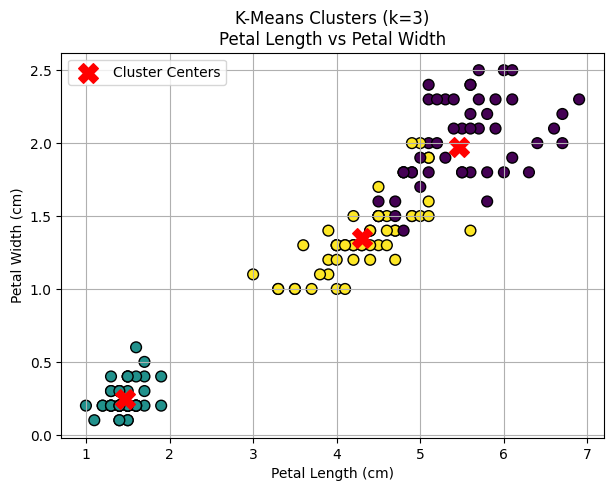

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------
# Load and preprocess data
# ---------------------------------------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[iris.feature_names])

# ---------------------------------------
# Fit K-means with k = 3
# ---------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predicted clusters
clusters = kmeans.labels_

# ---------------------------------------
# Visualization: Petal Length vs Petal Width
# ---------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(
    df["petal length (cm)"],
    df["petal width (cm)"],
    c=clusters,
    cmap="viridis",
    s=60,
    edgecolor="k"
)

plt.title("K-Means Clusters (k=3)\nPetal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)

# Optional: plot cluster centers in original scale
centers = kmeans.cluster_centers_

# Extract only petal length & width centers
petal_centers = centers[:, [2, 3]]

# Undo scaling to plot centers accurately
petal_centers_original = scaler.inverse_transform(
    [[0,0,pl,pw] for pl,pw in petal_centers]
)[:, [2,3]]

plt.scatter(
    petal_centers_original[:, 0],
    petal_centers_original[:, 1],
    c="red",
    s=200,
    marker="X",
    label="Cluster Centers"
)

plt.legend()
plt.show()


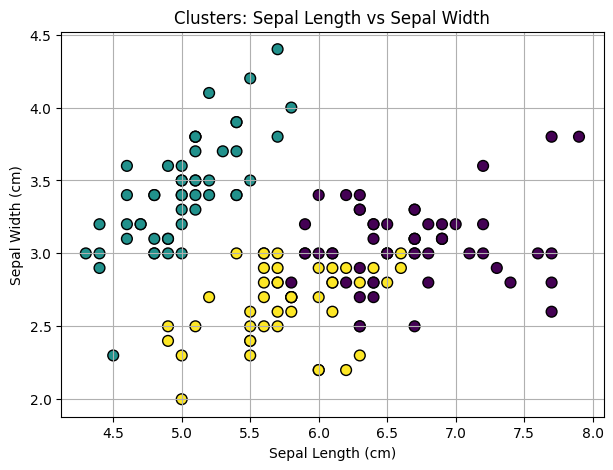

In [ ]:
#Sepal Length vs Sepal Width (Cluster Plot)

plt.figure(figsize=(7,5))
plt.scatter(
    df["sepal length (cm)"],
    df["sepal width (cm)"],
    c=clusters,
    cmap="viridis",
    s=60,
    edgecolor="k"
)

plt.title("Clusters: Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.grid(True)
plt.show()


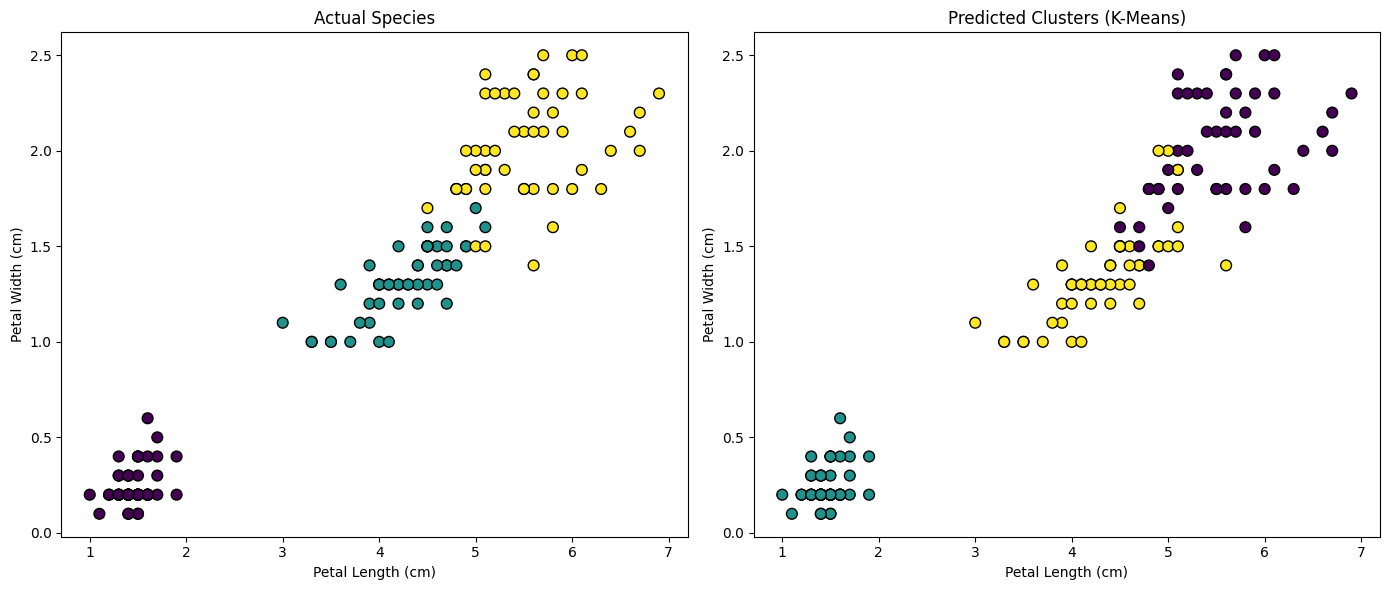

In [5]:
#True Species vs Predicted Clusters (Side-by-Side)
plt.figure(figsize=(14,6))

# True species
plt.subplot(1, 2, 1)
plt.scatter(
    df["petal length (cm)"], df["petal width (cm)"],
    c=df["species"], cmap="viridis", s=60, edgecolor="k"
)
plt.title("Actual Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Predicted clusters
plt.subplot(1, 2, 2)
plt.scatter(
    df["petal length (cm)"], df["petal width (cm)"],
    c=clusters, cmap="viridis", s=60, edgecolor="k"
)
plt.title("Predicted Clusters (K-Means)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()
